In [5]:
import tensorflow as tf
import numpy as np
from tf_deep import TFDeep
from data import eval_perf_multi
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
tf.app.flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')
mnist = input_data.read_data_sets(tf.app.flags.FLAGS.data_dir, one_hot=True)

tf.set_random_seed(100)
np.random.seed(100)

N = mnist.train.images.shape[0]
D = mnist.train.images.shape[1]
C = mnist.train.labels.shape[1]
print("Loaded data")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Loaded data


#### Model konfiguracije [784,10]



In [7]:
Y_test_ = np.argmax(mnist.test.labels, axis=1)
model = TFDeep([D, C], param_delta=0.15, param_lambda=0.001)
model.train(mnist.train.images, mnist.train.labels, 500, print_step=50)
Y_test = np.argmax(model.eval(mnist.test.images), axis=1)
eval_perf_multi(Y_test_, Y_test)

Iter 0 => loss: 51.889774322509766
Iter 50 => loss: 37.510032653808594
Iter 100 => loss: 30.6799259185791
Iter 150 => loss: 25.85194969177246
Iter 200 => loss: 22.014108657836914
Iter 250 => loss: 18.83545684814453
Iter 300 => loss: 16.159456253051758
Iter 350 => loss: 13.8896484375
Iter 400 => loss: 11.956985473632812
Iter 450 => loss: 10.307954788208008


(0.82520000000000004,
 [(0.86724806201550386, 0.91326530612244894),
  (0.92367736339982653, 0.93832599118942728),
  (0.84406438631790748, 0.81298449612403101),
  (0.79883381924198249, 0.81386138613861381),
  (0.81275303643724695, 0.81771894093686359),
  (0.75147928994082835, 0.71188340807174888),
  (0.85729058945191317, 0.86534446764091855),
  (0.86097318768619657, 0.8433852140077821),
  (0.74348697394789576, 0.76180698151950721),
  (0.7649442755825735, 0.74826560951437071)],
 array([[ 895,    1,   16,   17,    9,   32,   23,    9,   14,   16],
        [   0, 1065,   13,   10,    5,   13,    6,   14,   17,   10],
        [  10,    4,  839,   25,   13,   10,   25,   35,   20,   13],
        [   7,   17,   34,  822,    8,   60,    8,   16,   38,   19],
        [   0,    1,   18,    4,  803,   12,   26,   12,   15,   97],
        [  33,    3,    5,   54,    8,  635,   22,    4,   67,   14],
        [  20,    5,   29,   13,   18,   28,  829,    5,   12,    8],
        [   4,    0,   17,   

#### Model [784, 100, 10]

In [3]:
Y_train_ = np.argmax(mnist.train.labels, axis=1)
Y_test_ = np.argmax(mnist.test.labels, axis=1)
model1 = TFDeep([D, 100, C], param_delta=0.0015, param_lambda=0.000001)
model1.train(mnist.train.images, mnist.train.labels, 250, print_step=50)
Y_test = np.argmax(model1.eval(mnist.test.images), axis=1)
eval_perf_multi(Y_test_, Y_test)

Iter 0 => loss: 20.619083404541016
Iter 50 => loss: 20.519054412841797
Iter 100 => loss: 20.404430389404297
Iter 150 => loss: 20.272144317626953
Iter 200 => loss: 20.12302589416504


(0.0935,
 [(0.080967402733964244, 0.07857142857142857),
  (0.3935483870967742, 0.053744493392070485),
  (0.074196207749381696, 0.087209302325581398),
  (0.11303273625694873, 0.18118811881188118),
  (0.084435165854790079, 0.37067209775967414),
  (0.015544041450777202, 0.0033632286995515697),
  (0.052873563218390804, 0.024008350730688934),
  (0.11764705882352941, 0.0019455252918287938),
  (0.040293040293040296, 0.011293634496919919),
  (0.14525810324129651, 0.11992071357779981)],
 array([[ 77,  11,  79,  55,  94,   9, 112, 232,  65, 217],
        [ 36,  61,  13,   0,  15,   7,   8,  10,   3,   2],
        [ 67, 181,  90, 366, 102, 171,  57,  22, 111,  46],
        [113,  76,  81, 183, 235, 168,  64, 100, 251, 348],
        [194, 494, 704, 314, 364, 420, 611, 458, 505, 247],
        [ 20,  97,  11,   2,  16,   3,  29,   1,   9,   5],
        [ 94, 137,  29,  23,  30,  12,  23,  74,   6,   7],
        [  0,   0,   2,   0,   6,   1,   1,   2,   1,   4],
        [ 23,  66,  10,  38,  65,  24

#### Skup za validaciju

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(mnist.train.images, mnist.train.labels, test_size=0.2, random_state=42)
model = TFDeep([D, C], param_delta=0.15, param_lambda=0.001)
model.train_val(X_train, y_train, X_valid, y_valid, 500)
Y_test_ = np.argmax(mnist.test.labels, axis=1)
Y_test = np.argmax(model.eval(mnist.test.images), axis=1)
eval_perf_multi(Y_test_, Y_test)

Iter 0 => val loss: 18.88111686706543, train loss: 19.203182220458984
Saving model
Iter 10 => val loss: 16.465190887451172, train loss: 16.589309692382812
Saving model
Iter 20 => val loss: 14.965033531188965, train loss: 15.085945129394531
Saving model
Iter 30 => val loss: 13.295684814453125, train loss: 13.397741317749023
Saving model
Iter 40 => val loss: 11.991907119750977, train loss: 12.036184310913086
Saving model
Iter 50 => val loss: 11.079769134521484, train loss: 11.093186378479004
Saving model
Iter 60 => val loss: 10.404813766479492, train loss: 10.388388633728027
Saving model
Iter 70 => val loss: 9.89212417602539, train loss: 9.850378036499023
Saving model
Iter 80 => val loss: 9.481792449951172, train loss: 9.422518730163574
Saving model
Iter 90 => val loss: 9.117734909057617, train loss: 9.052176475524902
Saving model
Iter 100 => val loss: 8.730012893676758, train loss: 8.67037582397461
Saving model
Iter 110 => val loss: 8.166153907775879, train loss: 8.143924713134766
Savin

(0.77710000000000001,
 [(0.84122287968441811, 0.87040816326530612),
  (0.9038290293855743, 0.89427312775330392),
  (0.75475475475475473, 0.73062015503875966),
  (0.75730994152046782, 0.76930693069306932),
  (0.77108433734939763, 0.7820773930753564),
  (0.66587677725118488, 0.6300448430493274),
  (0.83350568769389866, 0.84133611691022969),
  (0.83449651046859419, 0.81420233463035019),
  (0.66798810703667, 0.69199178644763859),
  (0.71148184494602551, 0.71853320118929631)],
 array([[ 853,    0,   26,   13,    8,   36,   31,   13,   21,   13],
        [   0, 1015,   15,   14,    1,   15,   11,   15,   30,    7],
        [  15,   44,  754,   35,   10,   13,   34,   32,   49,   13],
        [  16,   16,   57,  777,    4,   74,    4,   16,   45,   17],
        [   2,    0,   23,    4,  768,   34,   22,   18,   12,  113],
        [  44,   16,   15,   68,   14,  562,   31,    7,   57,   30],
        [  17,    7,   27,   13,   29,   32,  806,    7,   24,    5],
        [   7,    2,   30,   15, 

#### Mini-batch

In [9]:
model = TFDeep([D, C], param_delta=0.15, param_lambda=0.01)
model.train_mb(mnist.train.images, mnist.train.labels, 500, 100)
Y_test_ = np.argmax(mnist.test.labels, axis=1)
Y_test = np.argmax(model.eval(mnist.test.images), axis=1)
eval_perf_multi(Y_test_, Y_test)

Iter 0 => loss: 7.584579944610596
Iter 10 => loss: 0.711775541305542
Iter 20 => loss: 0.44324976205825806
Iter 30 => loss: 0.5936893820762634
Iter 40 => loss: 0.49334269762039185
Iter 50 => loss: 0.5475422739982605
Iter 60 => loss: 0.6129966378211975
Iter 70 => loss: 0.6339586973190308
Iter 80 => loss: 0.4549546241760254
Iter 90 => loss: 0.5359023809432983
Iter 100 => loss: 0.5844183564186096
Iter 110 => loss: 0.6117267608642578
Iter 120 => loss: 0.5596888661384583
Iter 130 => loss: 0.4994206726551056
Iter 140 => loss: 0.5423874855041504
Iter 150 => loss: 0.4992430806159973
Iter 160 => loss: 0.4288717210292816
Iter 170 => loss: 0.6103673577308655
Iter 180 => loss: 0.4397605359554291
Iter 190 => loss: 0.5603670477867126
Iter 200 => loss: 0.560918927192688
Iter 210 => loss: 0.4618157744407654
Iter 220 => loss: 0.5239970684051514
Iter 230 => loss: 0.6037610769271851
Iter 240 => loss: 0.5270404815673828
Iter 250 => loss: 0.6100277900695801
Iter 260 => loss: 0.6158938407897949
Iter 270 => l

(0.90539999999999998,
 [(0.92065009560229449, 0.98265306122448981),
  (0.93776641091219093, 0.96916299559471364),
  (0.92819429778247098, 0.85174418604651159),
  (0.89064039408866991, 0.89504950495049507),
  (0.88491295938104453, 0.93177189409368633),
  (0.8787528868360277, 0.85313901345291476),
  (0.92901878914405012, 0.92901878914405012),
  (0.90269749518304432, 0.91147859922178986),
  (0.86883525708289611, 0.85010266940451751),
  (0.90412371134020619, 0.86917740336967297)],
 array([[ 963,    0,   15,    5,    2,   12,   19,    4,   11,   15],
        [   0, 1100,   14,    3,    6,    7,    3,   20,   12,    8],
        [   1,    2,  879,   15,    5,    1,    6,   22,   11,    5],
        [   2,    3,   20,  904,    1,   42,    1,    4,   27,   11],
        [   1,    0,   17,    1,  915,   13,   15,   11,   14,   47],
        [   5,    2,    3,   29,    1,  761,   21,    0,   33,   11],
        [   5,    4,   15,    4,   10,   17,  890,    0,   13,    0],
        [   1,    2,   23,  

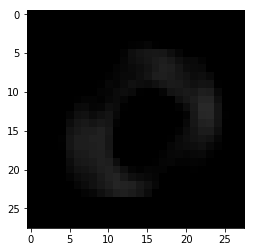

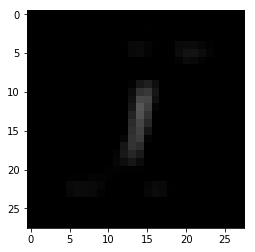

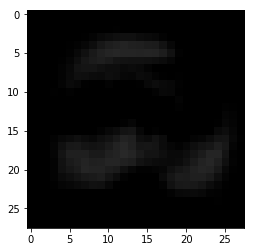

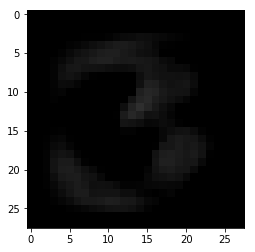

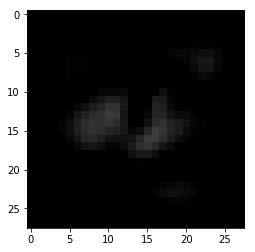

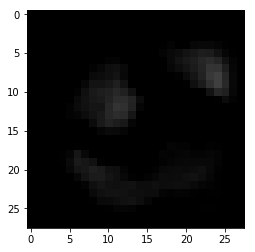

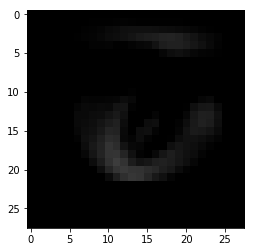

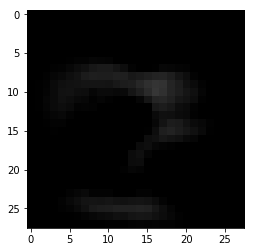

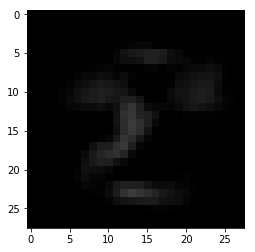

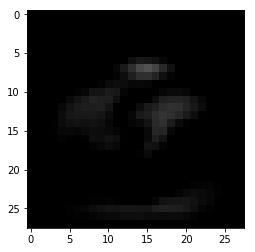

In [10]:
W = model.get_Ws()[0]
for i in range(10):
    plt.imshow(W[:,i].reshape(28,28), cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.show()

#### Adam

In [4]:
model = TFDeep([D, C], param_delta=1e-4, param_lambda=0.01, optimizer=tf.train.AdamOptimizer)
model.train_mb(mnist.train.images, mnist.train.labels, 200, 100)
Y_test_ = np.argmax(mnist.test.labels, axis=1)
Y_test = np.argmax(model.eval(mnist.test.images), axis=1)
eval_perf_multi(Y_test_, Y_test)

Iter 0 => loss: 46.490142822265625
Iter 10 => loss: 20.045557022094727
Iter 20 => loss: 9.171930313110352
Iter 30 => loss: 3.656351089477539
Iter 40 => loss: 1.3995842933654785
Iter 50 => loss: 0.749605655670166
Iter 60 => loss: 0.518329381942749
Iter 70 => loss: 0.704719066619873
Iter 80 => loss: 0.6530693769454956
Iter 90 => loss: 0.6117146611213684
Iter 100 => loss: 0.6614542603492737
Iter 110 => loss: 0.6086908578872681
Iter 120 => loss: 0.5538116693496704
Iter 130 => loss: 0.53743976354599
Iter 140 => loss: 0.4888560175895691
Iter 150 => loss: 0.6028777956962585
Iter 160 => loss: 0.5319275259971619
Iter 170 => loss: 0.49698907136917114
Iter 180 => loss: 0.6462604999542236
Iter 190 => loss: 0.7663649320602417


(0.90759999999999996,
 [(0.93548387096774188, 0.97653061224489801),
  (0.93474576271186438, 0.9718061674008811),
  (0.92887029288702927, 0.86046511627906974),
  (0.88349514563106801, 0.90099009900990101),
  (0.90400000000000003, 0.92057026476578407),
  (0.89166666666666672, 0.83968609865470856),
  (0.92073170731707321, 0.94572025052192066),
  (0.91956305858987086, 0.90077821011673154),
  (0.87187499999999996, 0.85934291581108835),
  (0.8784313725490196, 0.88800792864222)],
 array([[ 957,    0,   12,    5,    1,   11,   13,    3,    9,   12],
        [   0, 1103,   14,    2,    7,    8,    3,   22,   13,    8],
        [   2,    2,  888,   16,    4,    2,    5,   22,   10,    5],
        [   2,    3,   19,  910,    1,   48,    2,    5,   27,   13],
        [   1,    0,   14,    1,  904,   12,   10,   10,    8,   40],
        [   5,    2,    0,   26,    1,  749,   17,    0,   30,   10],
        [   9,    4,   18,    4,   12,   18,  906,    0,   13,    0],
        [   1,    1,   20,   16,

#### Adam + Decay

In [5]:
model = TFDeep([D, 100, C], param_delta=1e-3, param_lambda=0.001, optimizer=tf.train.AdamOptimizer, use_decay=True)
model.train_mb(mnist.train.images, mnist.train.labels, 200, 100)
Y_test_ = np.argmax(mnist.test.labels, axis=1)
Y_test = np.argmax(model.eval(mnist.test.images), axis=1)
eval_perf_multi(Y_test_, Y_test)

Iter 0 => loss: 31.951736450195312
Iter 10 => loss: 6.281090259552002
Iter 20 => loss: 2.994577646255493
Iter 30 => loss: 1.8639854192733765
Iter 40 => loss: 1.2663469314575195
Iter 50 => loss: 1.1712768077850342
Iter 60 => loss: 0.9570293426513672
Iter 70 => loss: 0.8582539558410645
Iter 80 => loss: 0.8394984006881714
Iter 90 => loss: 0.8049948811531067
Iter 100 => loss: 0.7906666994094849
Iter 110 => loss: 0.7778822779655457
Iter 120 => loss: 0.7787295579910278
Iter 130 => loss: 0.8052607178688049
Iter 140 => loss: 0.7740334272384644
Iter 150 => loss: 0.7993950843811035
Iter 160 => loss: 0.8005402088165283
Iter 170 => loss: 0.7703315019607544
Iter 180 => loss: 0.7968160510063171
Iter 190 => loss: 0.7862389087677002


(0.96230000000000004,
 [(0.96796796796796791, 0.98673469387755097),
  (0.9850220264317181, 0.9850220264317181),
  (0.95861405197305105, 0.96511627906976749),
  (0.95566502463054193, 0.96039603960396036),
  (0.9620512820512821, 0.95519348268839099),
  (0.95833333333333337, 0.95403587443946192),
  (0.97248677248677251, 0.95929018789144049),
  (0.95660559305689485, 0.96498054474708173),
  (0.94922279792746111, 0.94045174537987675),
  (0.95409181636726548, 0.94747274529236869)],
 array([[ 967,    0,    4,    0,    2,    6,   11,    0,    4,    5],
        [   1, 1118,    3,    0,    0,    0,    4,    4,    1,    4],
        [   2,    2,  996,    9,    6,    0,    5,    8,    9,    2],
        [   1,    3,    3,  970,    1,   10,    1,    7,   12,    7],
        [   1,    0,    7,    0,  938,    0,    6,    1,    7,   15],
        [   1,    1,    2,   10,    3,  851,    8,    0,    9,    3],
        [   3,    3,    2,    0,    5,    8,  919,    0,    4,    1],
        [   2,    2,    4,    

#### SVM

In [11]:
model = svm.SVC(decision_function_shape='ovo', cache_size=1000)
model.fit(mnist.train.images, np.argmax(mnist.train.labels, axis=1))
Y_test_ = np.argmax(mnist.test.labels, axis=1)
Y_test = model.predict(mnist.test.images)
eval_perf_multi(Y_test_, Y_test)

(0.94389999999999996,
 [(0.96027805362462759, 0.98673469387755097),
  (0.9671848013816926, 0.986784140969163),
  (0.9375, 0.93023255813953487),
  (0.92592592592592593, 0.94059405940594054),
  (0.92680514342235409, 0.95417515274949083),
  (0.92988505747126438, 0.90695067264573992),
  (0.94580777096114521, 0.96555323590814202),
  (0.95787362086258776, 0.92898832684824906),
  (0.94192185850052801, 0.91581108829568791),
  (0.94093686354378814, 0.9157581764122894)],
 array([[ 967,    0,    8,    0,    1,    7,    9,    2,    4,    9],
        [   0, 1120,    1,    1,    1,    5,    3,   13,    7,    7],
        [   1,    2,  960,   16,    7,    5,    4,   22,    7,    0],
        [   0,    3,    9,  950,    0,   32,    1,    5,   14,   12],
        [   0,    0,   11,    1,  937,    7,    6,    8,    8,   33],
        [   5,    1,    1,   17,    0,  809,    9,    0,   23,    5],
        [   5,    3,   14,    1,    8,   11,  925,    0,   10,    1],
        [   1,    1,    8,    9,    2,    2,

In [14]:
model = svm.SVC(decision_function_shape='ovo', kernel='linear', cache_size=1000)
model.fit(mnist.train.images, np.argmax(mnist.train.labels, axis=1))
Y_test_ = np.argmax(mnist.test.labels, axis=1)
Y_test = model.predict(mnist.test.images)
eval_perf_multi(Y_test_, Y_test)

(0.93930000000000002,
 [(0.95129224652087474, 0.97653061224489801),
  (0.97140381282495669, 0.98766519823788546),
  (0.92720306513409967, 0.93798449612403101),
  (0.9049904030710173, 0.93366336633663372),
  (0.93089832181638699, 0.96028513238289204),
  (0.91609977324263037, 0.905829596412556),
  (0.95478443743427965, 0.94780793319415446),
  (0.952191235059761, 0.92996108949416345),
  (0.92993630573248409, 0.89938398357289528),
  (0.94906444906444909, 0.90485629335976214)],
 array([[ 957,    0,    9,    2,    1,    9,   12,    2,    8,    6],
        [   0, 1121,    5,    4,    1,    2,    2,    6,    7,    6],
        [   4,    4,  968,   16,    8,    3,   11,   20,    6,    4],
        [   1,    2,   10,  943,    1,   39,    1,   11,   25,    9],
        [   1,    0,    2,    1,  943,    5,    5,   10,    7,   39],
        [   7,    1,    3,   17,    1,  808,   17,    0,   25,    3],
        [   8,    1,   11,    1,    5,   10,  908,    0,    7,    0],
        [   1,    1,    7,    8,